# YOLO Balatro Card Detection - Prediction and Visualization

In [16]:
from ultralytics import YOLO
import os

# Global configuration
SAVE_PREDICTIONS = False  # Set to False to disable saving
OUTPUT_DIR = "prediction_outputs"  # Directory to save results

# Create output directory if it doesn't exist
if SAVE_PREDICTIONS and not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
    print(f"Created output directory: {OUTPUT_DIR}")

# Load your trained model
model_path = "../../runs/v2-balatro-entities-2000-epoch/weights/best.pt"
model = YOLO(model_path)

print(f"Model loaded from: {model_path}")
print(f"Model classes: {model.names}")
print(f"Save predictions: {SAVE_PREDICTIONS}")
if SAVE_PREDICTIONS:
    print(f"Output directory: {OUTPUT_DIR}")

Created output directory: prediction_outputs
Model loaded from: ../../runs/v2-balatro-entities-2000-epoch/weights/best.pt
Model classes: {0: 'card_description', 1: 'card_pack', 2: 'joker_card', 3: 'planet_card', 4: 'poker_card_back', 5: 'poker_card_description', 6: 'poker_card_front', 7: 'poker_card_stack', 8: 'spectral_card', 9: 'tarot_card'}
Save predictions: True
Output directory: prediction_outputs


In [17]:
import os

# Test with available frame images
test_images = [
    "../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_2560.png",
    "../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_3929.png",
    "../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_6557.png",
    "../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_7340.png",
    "../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_01707.jpg",
    "../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_02019.jpg",
    "../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_13807.jpg",
]

# Check which images exist
available_images = [img for img in test_images if os.path.exists(img)]
print(f"Available test images: {available_images}")

Available test images: ['../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_2560.png', '../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_3929.png', '../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_6557.png', '../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_7340.png', '../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_01707.jpg', '../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_02019.jpg', '../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_13807.jpg']


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Advanced visualization with different colors for different classes
def visualize_predictions_advanced(image_path, model, conf_threshold=0.5):
    """
    Advanced visualization with different colors for different classes
    """
    # Color palette for different classes
    colors = [
        (255, 0, 0),    # Red
        (0, 255, 0),    # Green
        (0, 0, 255),    # Blue
        (255, 255, 0),  # Yellow
        (255, 0, 255),  # Magenta
        (0, 255, 255),  # Cyan
        (255, 128, 0),  # Orange
        (128, 0, 255),  # Purple
    ]

    # Run prediction
    results = model(image_path, conf=conf_threshold)

    # Load the original image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_with_boxes = image_rgb.copy()

    # Process results
    class_counts = {}

    for result in results:
        boxes = result.boxes
        if boxes is not None:
            for box in boxes:
                # Get box coordinates
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)

                # Get confidence and class
                conf = box.conf[0].cpu().numpy()
                cls = int(box.cls[0].cpu().numpy())
                class_name = model.names[cls]

                # Count classes
                class_counts[class_name] = class_counts.get(class_name, 0) + 1

                # Get color for this class
                color = colors[cls % len(colors)]

                # Draw bounding box
                cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), color, 3)

                # Draw label with confidence
                label = f"{class_name}: {conf:.2f}"
                label_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)[0]
                cv2.rectangle(image_with_boxes, (x1, y1 - label_size[1] - 10),
                            (x1 + label_size[0], y1), color, -1)
                cv2.putText(image_with_boxes, label, (x1, y1 - 5),
                          cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # Display results
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image', fontsize=16)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_with_boxes)
    plt.title(f'Predictions (conf > {conf_threshold})', fontsize=16)
    plt.axis('off')

    plt.tight_layout()

    # Save if enabled
    if SAVE_PREDICTIONS:
        image_name = os.path.basename(image_path).split('.')[0]
        # Save matplotlib figure
        save_path = os.path.join(OUTPUT_DIR, f"{image_name}_advanced_prediction.png")
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Visualization saved to: {save_path}")

        # Save annotated image only
        annotated_path = os.path.join(OUTPUT_DIR, f"{image_name}_annotated.jpg")
        image_bgr = cv2.cvtColor(image_with_boxes, cv2.COLOR_RGB2BGR)
        cv2.imwrite(annotated_path, image_bgr)
        print(f"Annotated image saved to: {annotated_path}")

    plt.show()

    # Print detection summary
    print(f"\nClass Summary:")
    for class_name, count in class_counts.items():
        print(f"  {class_name}: {count} detections")

    return results

Running prediction on: ../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_2560.png



image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/src/notebooks/../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_2560.png: 352x640 2 joker_cards, 7 poker_card_fronts, 1 poker_card_stack, 2 tarot_cards, 2.5ms
Speed: 0.5ms preprocess, 2.5ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)
Visualization saved to: prediction_outputs/out_2560_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_2560_annotated.jpg


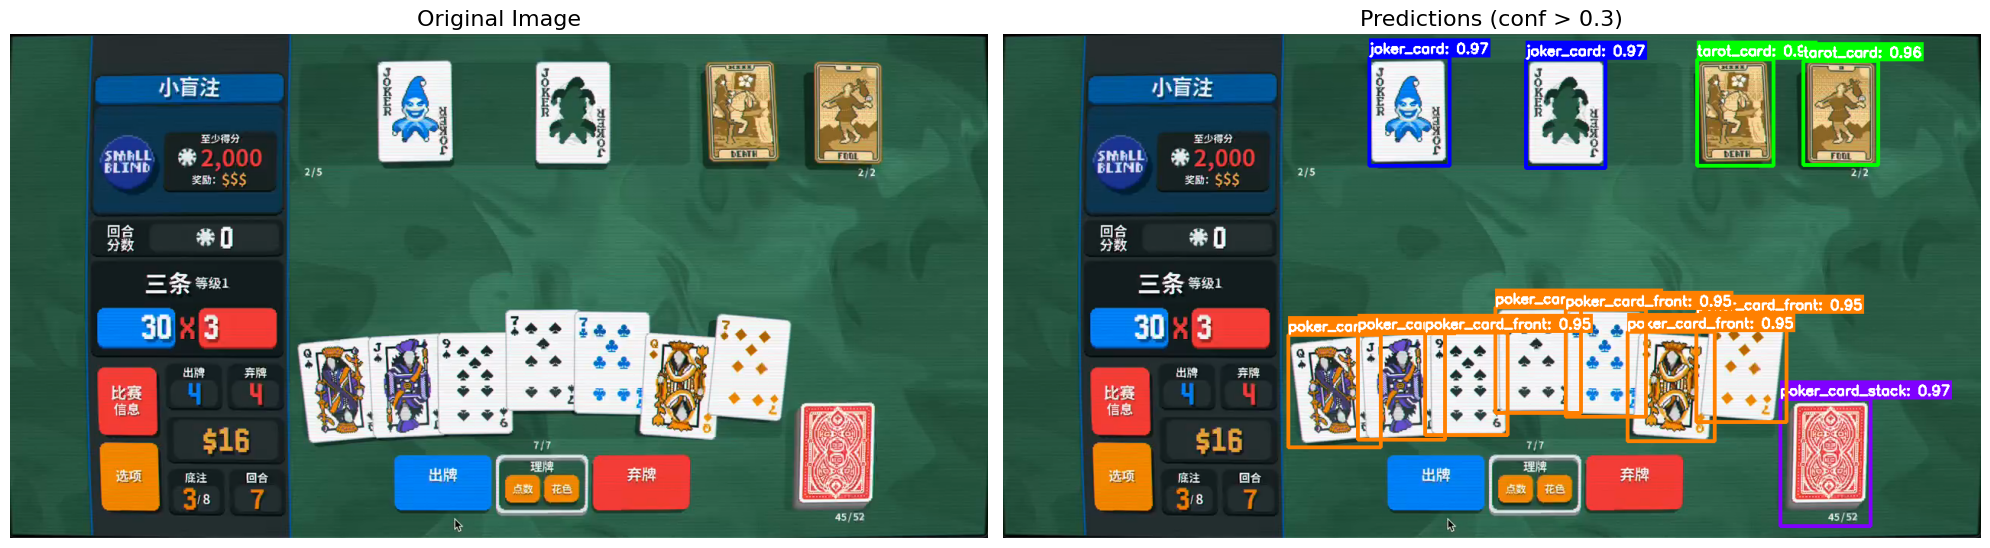


Class Summary:
  joker_card: 2 detections
  tarot_card: 2 detections
  poker_card_stack: 1 detections
  poker_card_front: 7 detections


In [19]:
# Run prediction on the first available image
if available_images:
    test_image = available_images[0]
    print(f"Running prediction on: {test_image}")
    results = visualize_predictions_advanced(test_image, model, conf_threshold=0.3)
else:
    print("No test images found. Please add some images to test.")

Testing advanced visualization:

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/src/notebooks/../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_2560.png: 352x640 2 joker_cards, 7 poker_card_fronts, 1 poker_card_stack, 2 tarot_cards, 2.4ms
Speed: 0.6ms preprocess, 2.4ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)
Visualization saved to: prediction_outputs/out_2560_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_2560_annotated.jpg


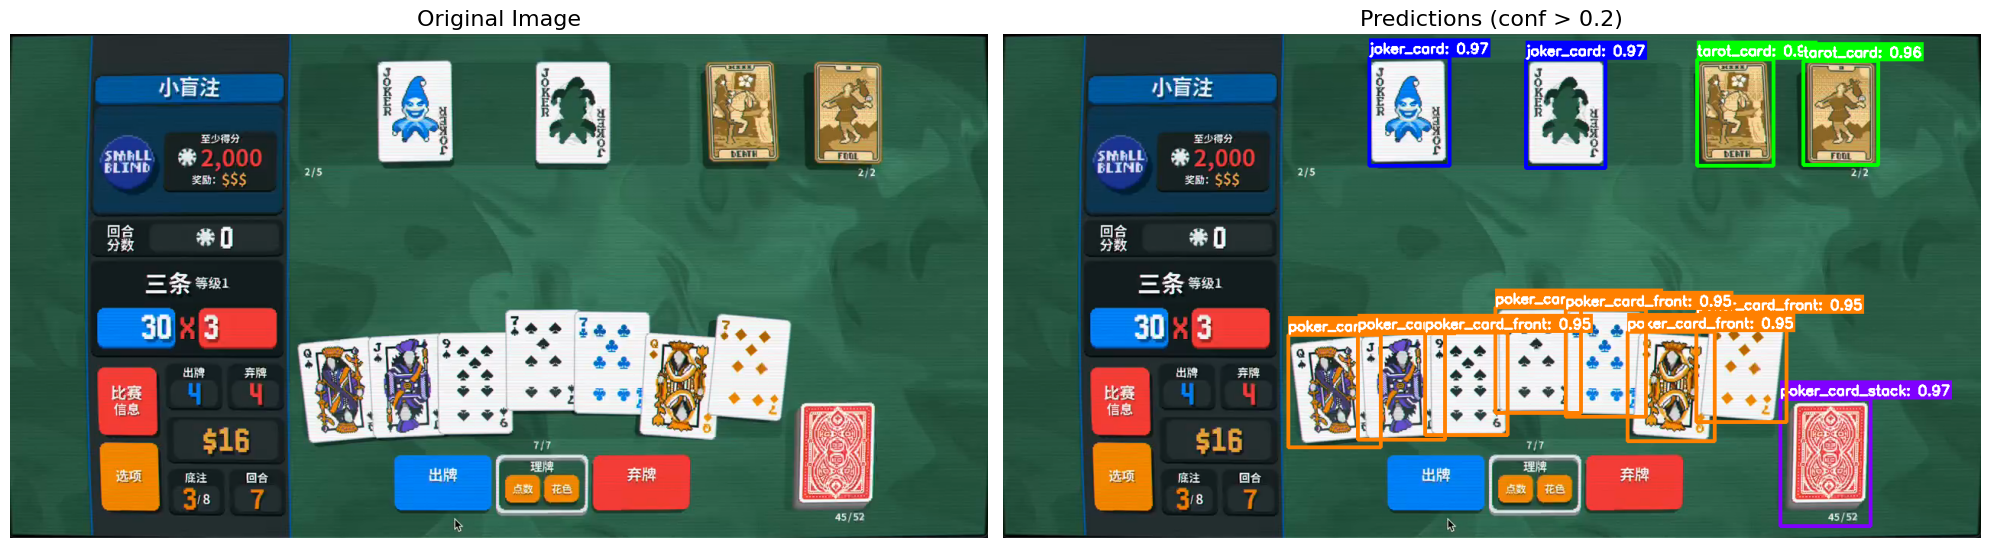


Class Summary:
  joker_card: 2 detections
  tarot_card: 2 detections
  poker_card_stack: 1 detections
  poker_card_front: 7 detections


In [20]:
# Test the advanced visualization
if available_images:
    print("Testing advanced visualization:")
    results = visualize_predictions_advanced(available_images[0], model, conf_threshold=0.2)


Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_2560.png

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/src/notebooks/../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_2560.png: 352x640 2 joker_cards, 7 poker_card_fronts, 1 poker_card_stack, 2 tarot_cards, 2.4ms
Speed: 0.6ms preprocess, 2.4ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)
Visualization saved to: prediction_outputs/out_2560_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_2560_annotated.jpg


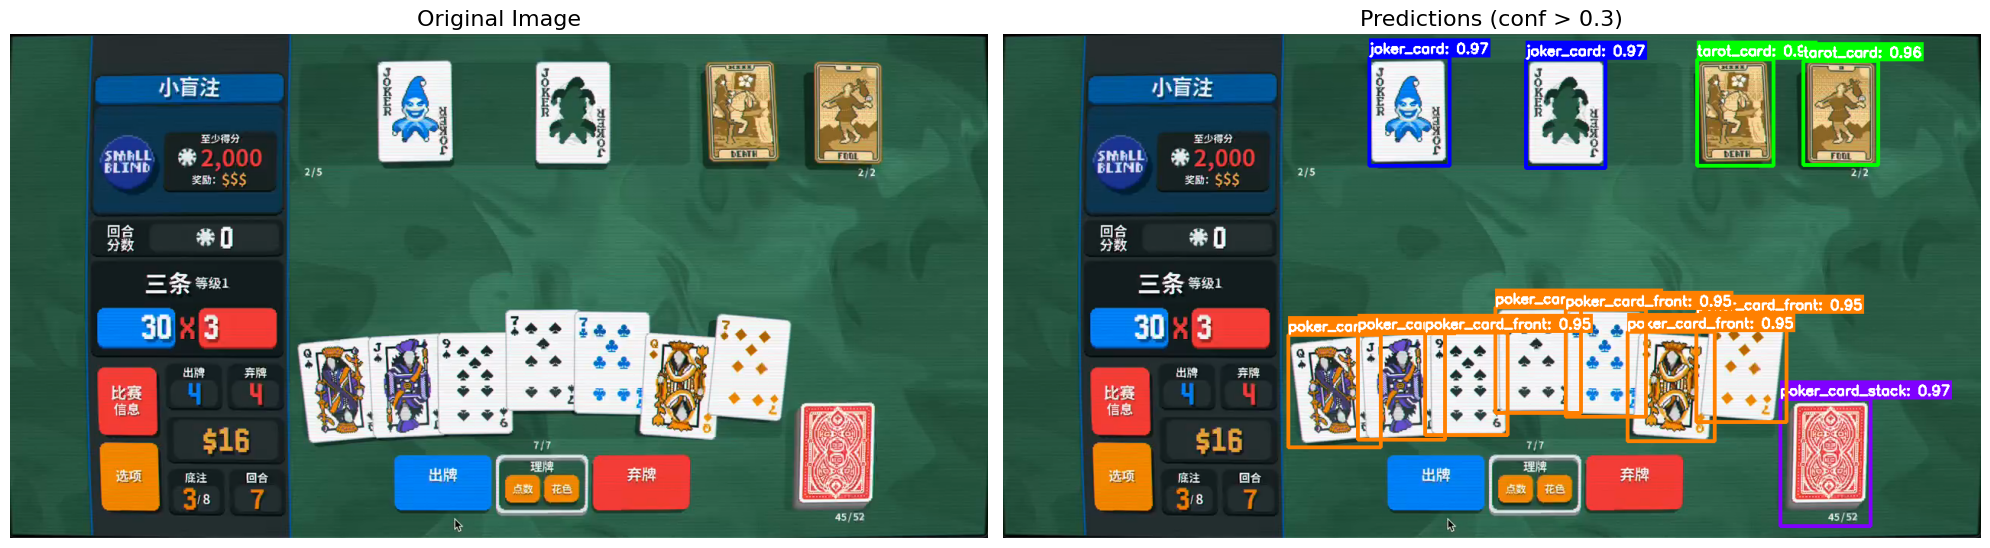


Class Summary:
  joker_card: 2 detections
  tarot_card: 2 detections
  poker_card_stack: 1 detections
  poker_card_front: 7 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_3929.png

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/src/notebooks/../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_3929.png: 352x640 45 poker_card_fronts, 2.5ms
Speed: 0.6ms preprocess, 2.5ms inference, 5.6ms postprocess per image at shape (1, 3, 352, 640)
Visualization saved to: prediction_outputs/out_3929_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_3929_annotated.jpg


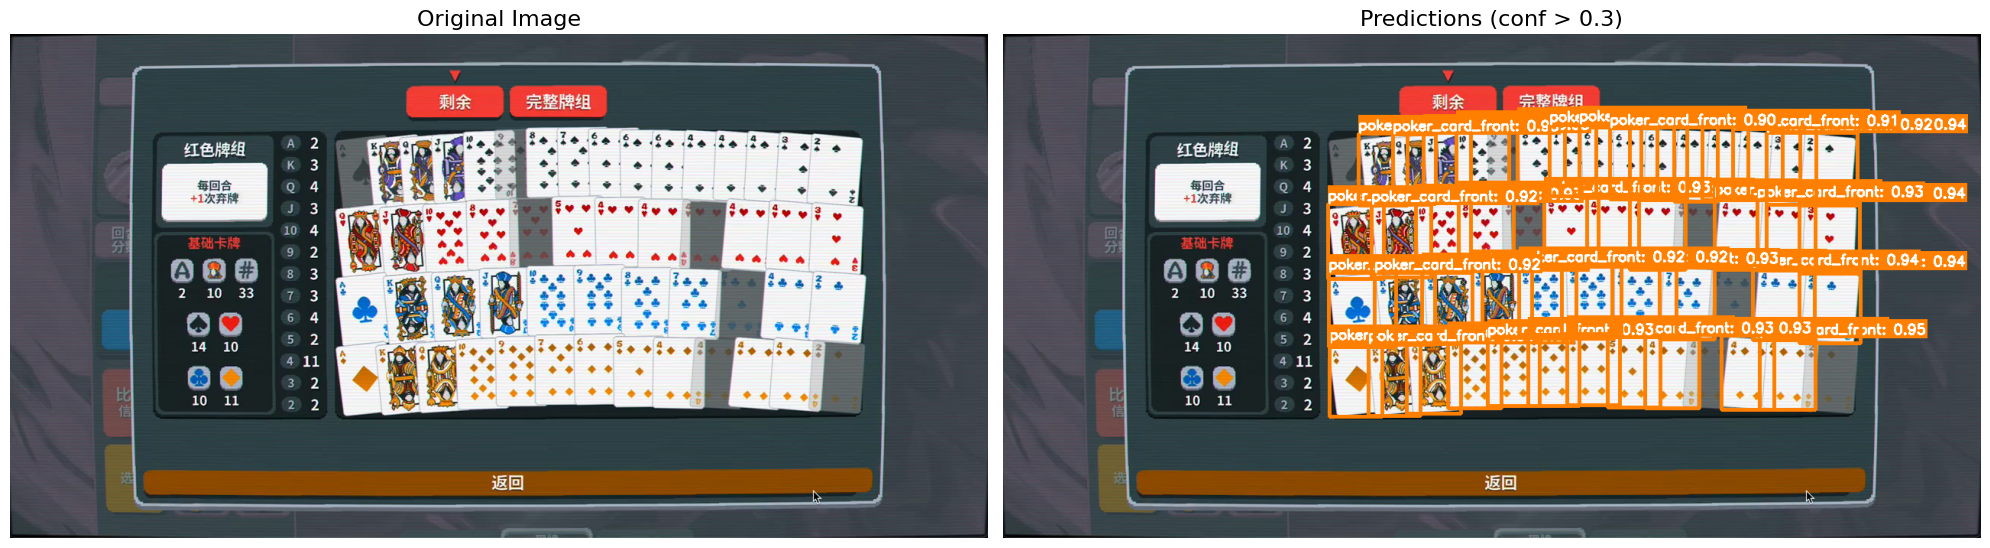


Class Summary:
  poker_card_front: 45 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_6557.png

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/src/notebooks/../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_6557.png: 352x640 1 card_description, 3 joker_cards, 1 poker_card_description, 7 poker_card_fronts, 1 poker_card_stack, 2.5ms
Speed: 0.6ms preprocess, 2.5ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 640)
Visualization saved to: prediction_outputs/out_6557_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_6557_annotated.jpg


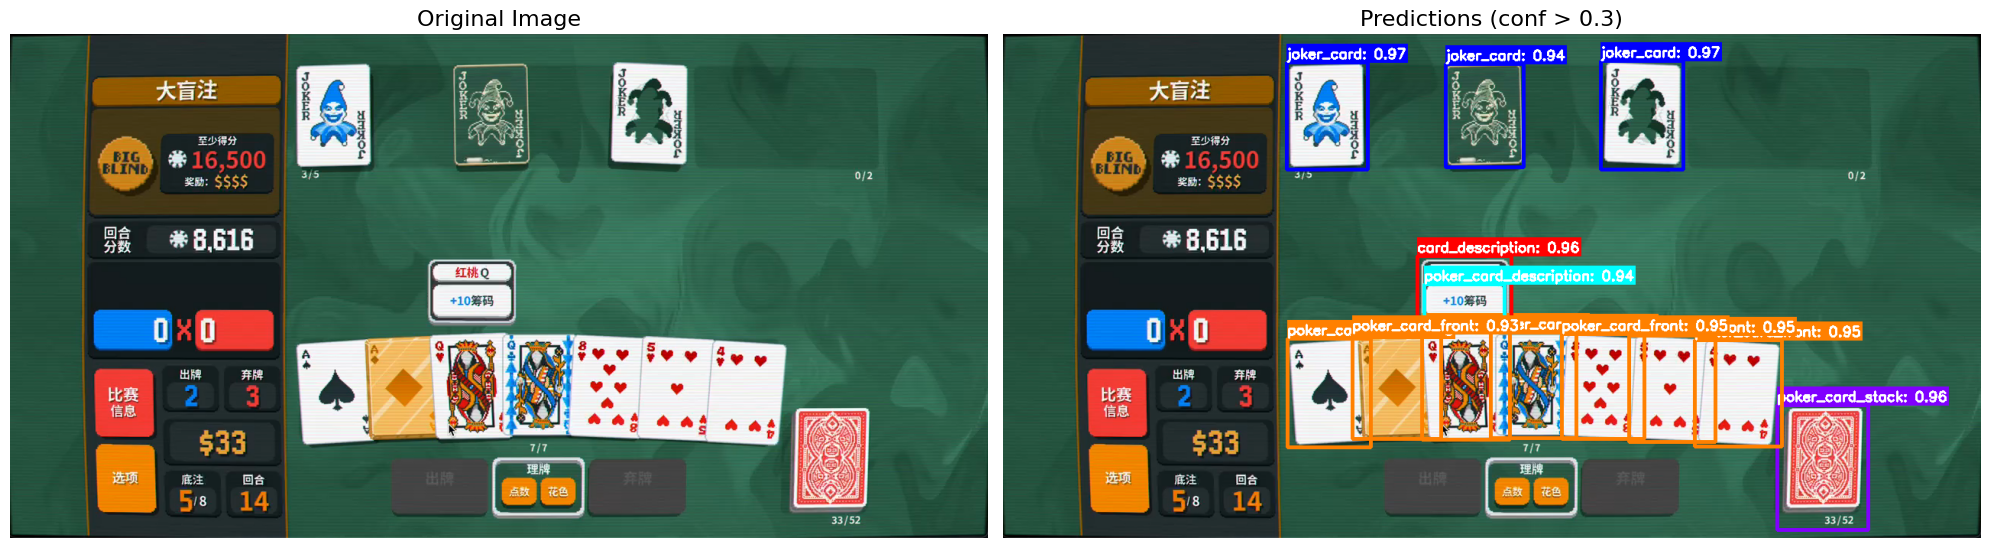


Class Summary:
  joker_card: 3 detections
  poker_card_front: 7 detections
  poker_card_stack: 1 detections
  card_description: 1 detections
  poker_card_description: 1 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_7340.png

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/src/notebooks/../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_7340.png: 352x640 1 card_description, 3 joker_cards, 1 poker_card_description, 7 poker_card_fronts, 1 poker_card_stack, 2.6ms
Speed: 0.6ms preprocess, 2.6ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 640)
Visualization saved to: prediction_outputs/out_7340_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_7340_annotated.jpg


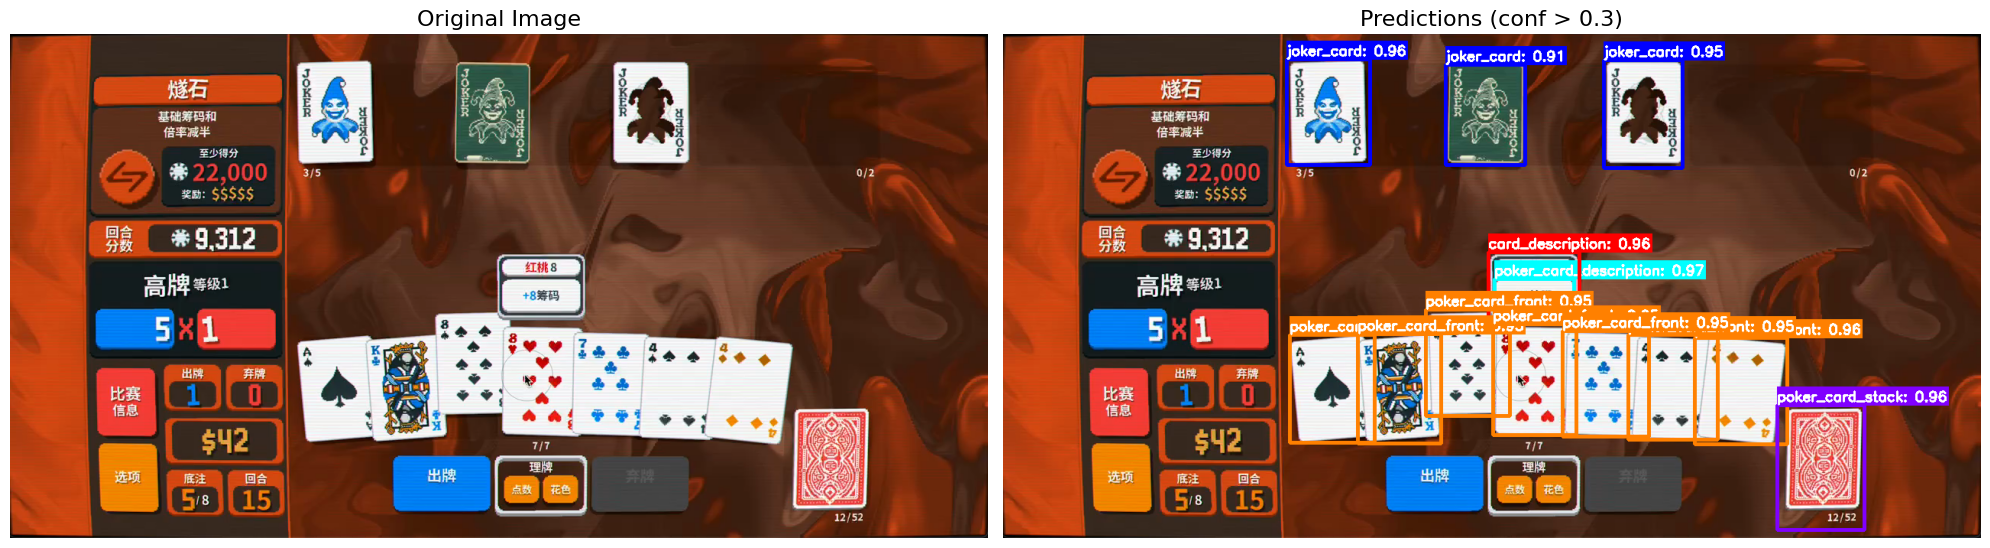


Class Summary:
  poker_card_description: 1 detections
  card_description: 1 detections
  joker_card: 3 detections
  poker_card_front: 7 detections
  poker_card_stack: 1 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_01707.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/src/notebooks/../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_01707.jpg: 352x640 1 card_description, 1 joker_card, 8 poker_card_fronts, 1 poker_card_stack, 2.4ms
Speed: 0.6ms preprocess, 2.4ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)
Visualization saved to: prediction_outputs/out_01707_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_01707_annotated.jpg


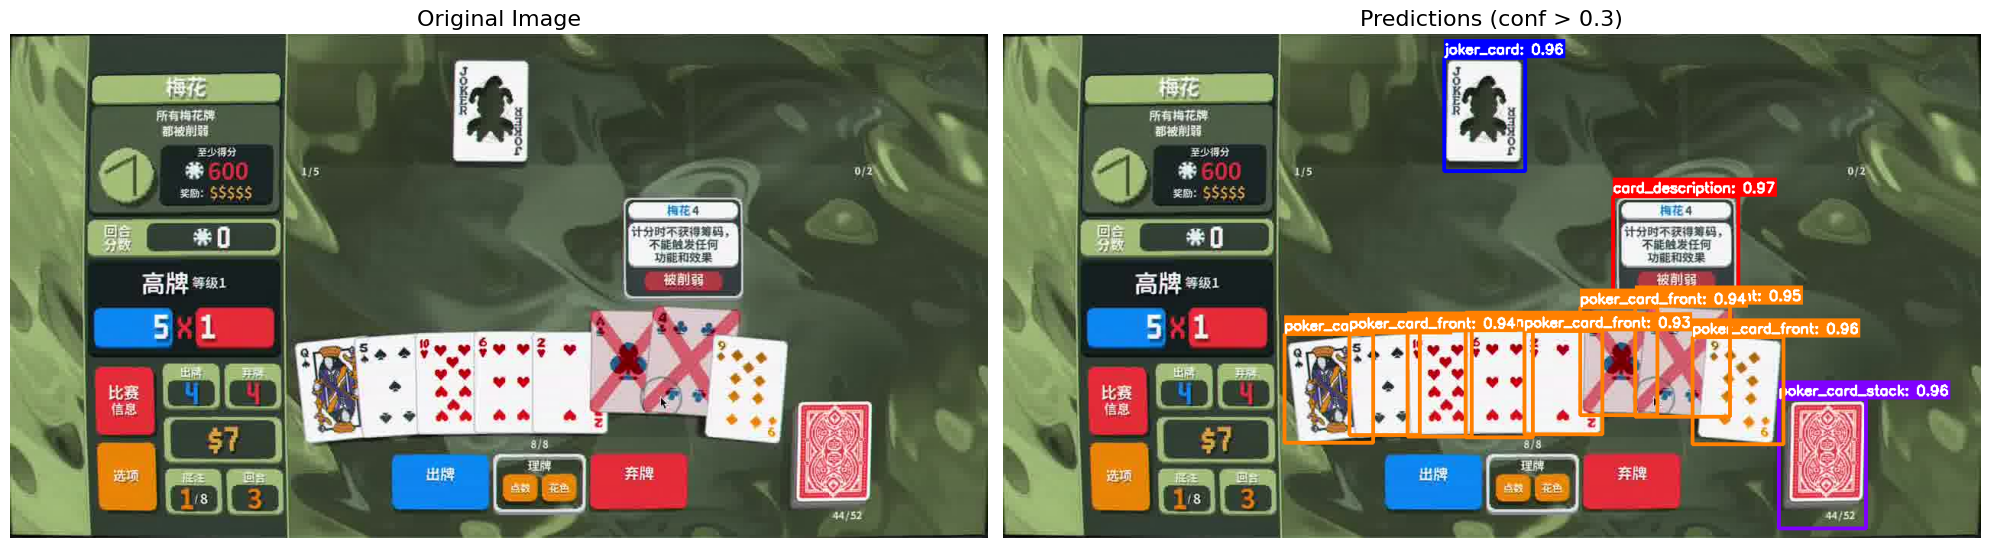


Class Summary:
  card_description: 1 detections
  poker_card_stack: 1 detections
  poker_card_front: 8 detections
  joker_card: 1 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_02019.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/src/notebooks/../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_02019.jpg: 352x640 1 card_description, 2 card_packs, 2 joker_cards, 1 planet_card, 1 poker_card_stack, 2.4ms
Speed: 0.6ms preprocess, 2.4ms inference, 1.2ms postprocess per image at shape (1, 3, 352, 640)
Visualization saved to: prediction_outputs/out_02019_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_02019_annotated.jpg


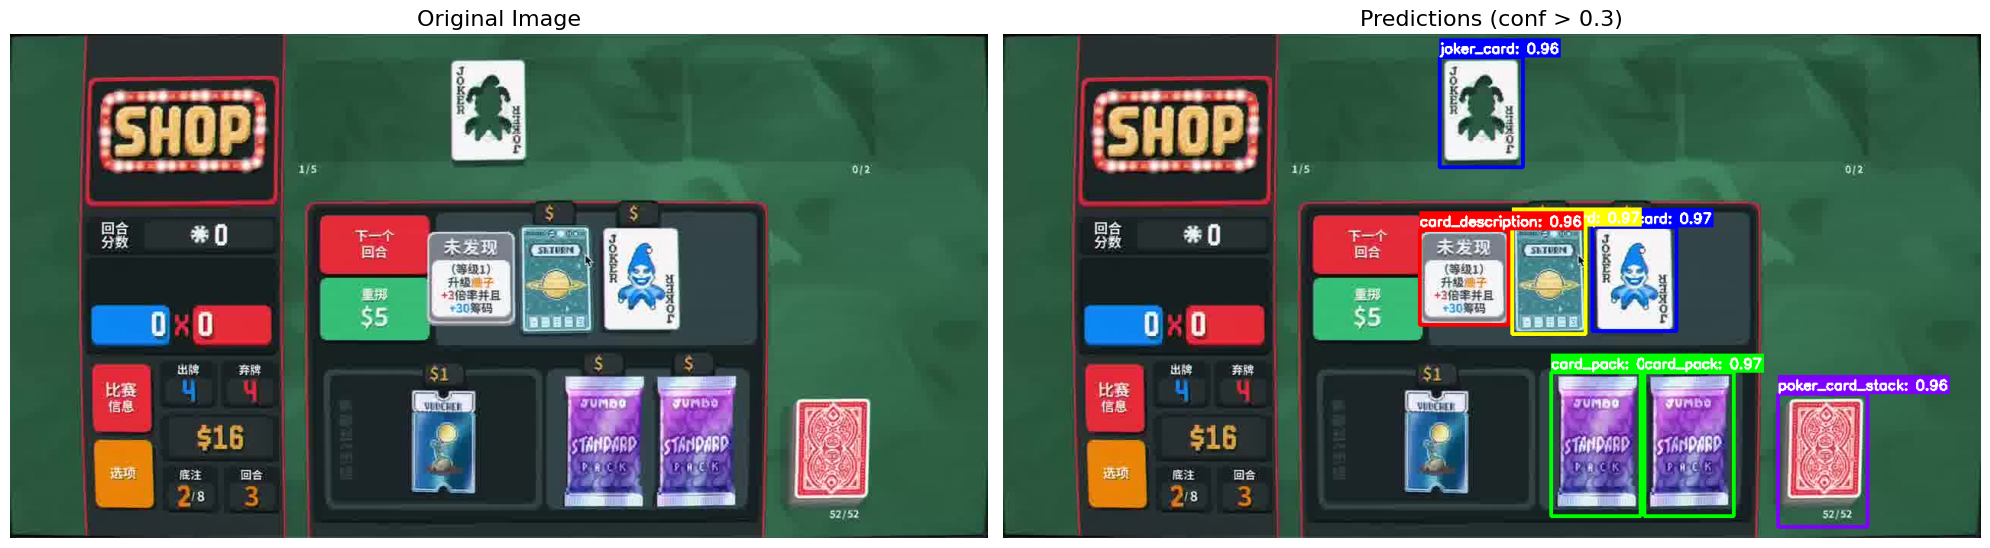


Class Summary:
  joker_card: 2 detections
  card_pack: 2 detections
  planet_card: 1 detections
  poker_card_stack: 1 detections
  card_description: 1 detections

Testing: ../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_13807.jpg

image 1/1 /home/neko/Git/github.com/proj-airi/game-playing-ai-balatro/src/notebooks/../../data/datasets/games-balatro-2024-entities-detection/data/val/yolo/images/out_13807.jpg: 352x640 2 card_packs, 4 joker_cards, 1 planet_card, 1 poker_card_stack, 1 tarot_card, 2.4ms
Speed: 0.6ms preprocess, 2.4ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
Visualization saved to: prediction_outputs/out_13807_advanced_prediction.png
Annotated image saved to: prediction_outputs/out_13807_annotated.jpg


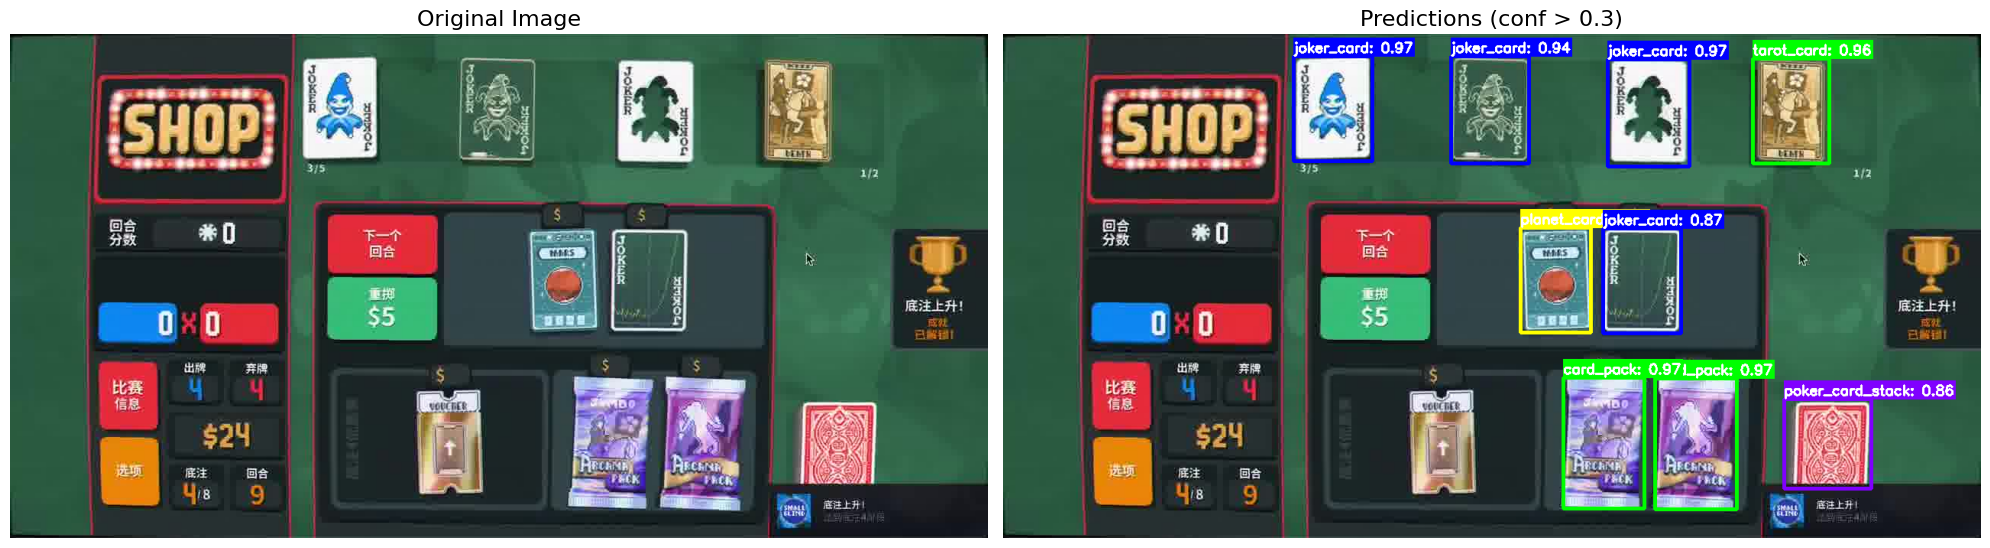


Class Summary:
  card_pack: 2 detections
  joker_card: 4 detections
  planet_card: 1 detections
  tarot_card: 1 detections
  poker_card_stack: 1 detections


In [21]:
# Test all available images
for image_path in available_images:
    print(f"\n{'='*50}")
    print(f"Testing: {image_path}")
    print(f"{'='*50}")
    visualize_predictions_advanced(image_path, model, conf_threshold=0.3)